<a href="https://colab.research.google.com/github/JuanVallejo32/Curso-IA---Talentotech2/blob/main/Proyecto_Unificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
#Leer y crear una copia del dataset
data1 = pd.read_excel('dataset_agri.xlsx')
data = data1.copy()
data

,Año,Departamento,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
0,2007,ANTIOQUIA,CAFE,112343.60,120500.80,1.07,14.54,14.66
1,2007,BOLIVAR,CAFE,502.00,446.00,0.89,0.05,0.07
2,2007,BOYACA,CAFE,11374.50,9683.10,0.85,1.17,1.48
3,2007,CALDAS,CAFE,78393.65,92815.00,1.18,11.20,10.23
4,2007,CAQUETA,CAFE,2295.00,2134.00,0.93,0.26,0.30
...,...,...,...,...,...,...,...,...
355,2022,RISARALDA,CAFE,33376.97,33387.59,1.00,4.98,4.77
356,2022,SANTANDER,CAFE,44378.29,45048.58,1.02,6.73,6.35
357,2022,SUCRE,CAFE,0.00,0.00,0.00,0.00,0.00
358,2022,TOLIMA,CAFE,90110.73,76413.90,0.85,11.41,12.89


**Información del dataset**

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        360 non-null    int64  
 1   Departamento               360 non-null    object 
 2   Producto                   360 non-null    object 
 3   Area (ha)                  360 non-null    float64
 4   Produccion (ton)           360 non-null    float64
 5   Rendimiento (ha/ton)       360 non-null    float64
 6   Produccion Nacional (ton)  360 non-null    float64
 7   Area Nacional (ha)         360 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 22.6+ KB


In [32]:
data1.dtypes

,0
Año,int64
Departamento,object
Producto,object
Area (ha),float64
Produccion (ton),float64
Rendimiento (ha/ton),float64
Produccion Nacional (ton),float64
Area Nacional (ha),float64


In [33]:
data1.shape

(360, 8)

In [34]:
#Se crea un dataframe en la variable data con las columnas a trabajar y se reemplazan los valores 0.0 por NaN
data = data1[['Area (ha)', 'Produccion (ton)','Rendimiento (ha/ton)']]
data.replace(0.0, np.nan, inplace=True)
data

<ipython-input-34-a23bbbcd4808>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(0.0, np.nan, inplace=True)


,Area (ha),Produccion (ton),Rendimiento (ha/ton)
0,112343.60,120500.80,1.07
1,502.00,446.00,0.89
2,11374.50,9683.10,0.85
3,78393.65,92815.00,1.18
4,2295.00,2134.00,0.93
...,...,...,...
355,33376.97,33387.59,1.00
356,44378.29,45048.58,1.02
357,NaN,NaN,NaN
358,90110.73,76413.90,0.85


In [35]:
#Separación variables y se eliminan los datos NaN
X = data[['Area (ha)','Produccion (ton)']].dropna()
y = data['Rendimiento (ha/ton)'].dropna()

In [36]:
# Pearson
correlation_prod, p_value_prod = pearsonr(X['Produccion (ton)'], y)
print(f'Coeficiente de correlación de Pearson entre Produccion (ton) y Rendimiento (ha/ton): {correlation_prod}')

correlation_area, p_value_area = pearsonr(X['Area (ha)'], y)
print(f'Coeficiente de correlación de Pearson entre Area (ha) y Rendimiento (ha/ton): {correlation_area}')


Coeficiente de correlación de Pearson entre Produccion (ton) y Rendimiento (ha/ton): 0.4554153805390943
Coeficiente de correlación de Pearson entre Area (ha) y Rendimiento (ha/ton): 0.3240945745788723


In [37]:
# Divido datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#DecisionTreeRegressor

In [38]:
#Modelo decision tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)

#Predeccion
Y_pred_tree = tree_model.predict(X_test)

#R2 Decision Tree
r2_tree = r2_score(Y_test, Y_pred_tree)

#Cross Validation
cv_r2_scores = cross_val_score(tree_model, X, y, cv=5, scoring='r2')

print(f'R2 Decision Tree: {r2_tree}')
print(f'Cross-Validation R^2 Scores: {cv_r2_scores}')
print(f'Cross Validation R2 Decision Tree mean: {cv_r2_scores.mean()}')

R2 Decision Tree: 0.7387673747949486
Cross-Validation R^2 Scores: [0.79619776 0.62716575 0.35632595 0.62635532 0.40010147]
Cross Validation R2 Decision Tree mean: 0.5612292522632433


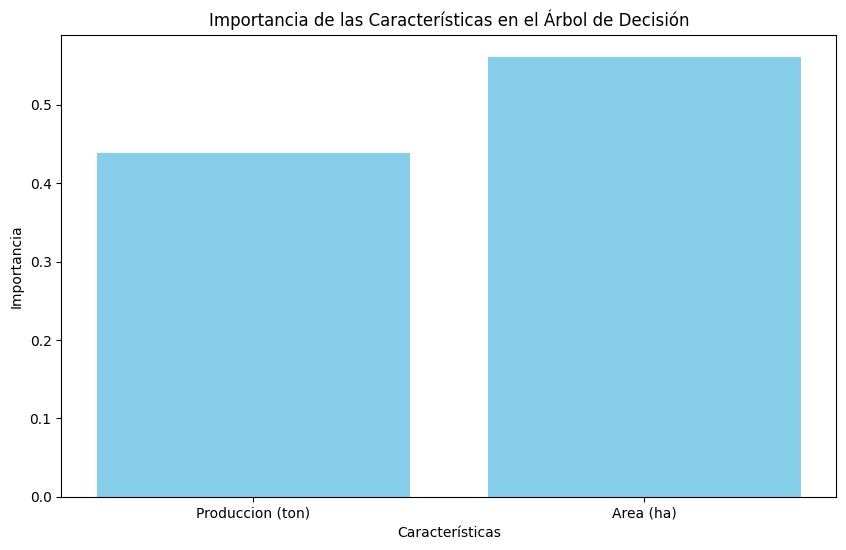

In [39]:
#Para ver que tanto influye x en y
# Obtener la importancia de las características del modelo
feature_importances = tree_model.feature_importances_
features = ['Produccion (ton)', 'Area (ha)']

# Crear un gráfico de barras para la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.show()

# Random Forest

In [46]:
#creacion del modelo
rf_regresion = RandomForestRegressor(n_estimators=100, random_state=42)
#se entrena el modelo
rf_regresion.fit(X_train, Y_train)
#se crea la prediccion
y_pred_rf = rf_regresion.predict(X_test)

In [47]:
#se crea el error medio cuadrado
mse = mean_squared_error(Y_test, y_pred_rf)
# se crea el R2 random forest
r2_rf = r2_score(Y_test, y_pred_rf)

# se imprime los resultados
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2_rf:.2f}')

Mean Squared Error: 0.06
R-squared Score: 0.76


In [48]:
# se realiza validacion cruzada
cvs_rf = cross_val_score(rf_regresion, X, y, cv=5, scoring='r2')
# se calcula la media de la validacion cruzada
cvs_rf_mean = cvs_rf.mean()
# se calcula la mediana de la validacion cruzada
cvs_rf_median = np.median(cvs_rf)



print(f'Validacion cruzada con R2 en Random Forest: {cvs_rf}')
print(f'Validacion cruzada con R2 con la media de Random Forest: {cvs_rf_mean}')
print(f'Validacion cruzada con R2 con la mediana de Random Forest: {cvs_rf_median}')

Validacion cruzada con R2 en Random Forest: [0.75161399 0.57406791 0.39857929 0.7676699  0.59649097]
Validacion cruzada con R2 con la media de Random Forest: 0.617684410894894
Validacion cruzada con R2 con la mediana de Random Forest: 0.5964909677419354


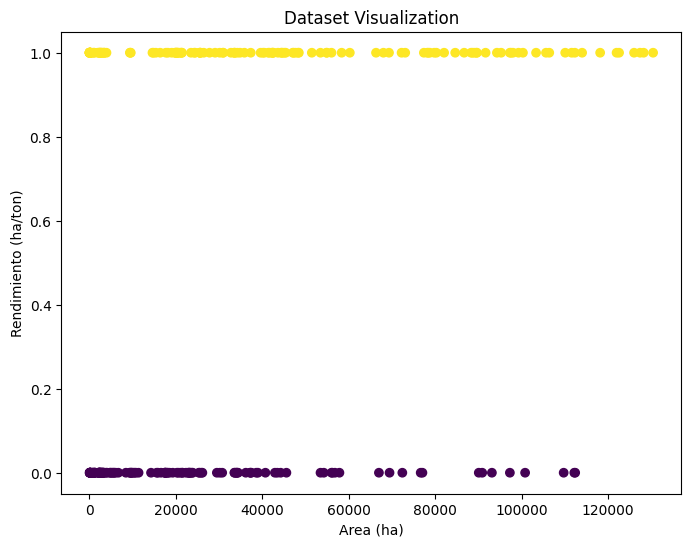

In [49]:
#se grafica
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train['Area (ha)'], Y_train, c=Y_train.values.ravel(), cmap='viridis')

#linea de codigo donde se genera un vertice pero se descuadra todo el grafico
#ax.plot([x_test.min(), x_test.max()], [x_test.min(), x_test.max()], 'k--', lw=1)

ax.set_xlabel('Area (ha)')
ax.set_ylabel('Rendimiento (ha/ton)')
ax.set_title("Dataset Visualization")
plt.show()

#Naive Bayes

**Se emplea el método Gaussiano ya que las variables son contínuas**

In [40]:
#Se hacen nuevamente la separación de variables dado que para este modelo los labels deben convertirse a binario
X = data[['Area (ha)','Produccion (ton)']].dropna()
y = data['Rendimiento (ha/ton)'].dropna() > y.mean()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Creación y entrenamiento del modelo
naive_modelo = GaussianNB() #Se utiliza el método Gaussiano ya que todos los features son de tipo continuo
naive_modelo.fit(X_train, Y_train)

#Predicción
y_predicciones = naive_modelo.predict(X_test)

**Métricas**

In [42]:
#Evaluar el modelo - Precisión
precision = accuracy_score(Y_test, y_predicciones)
print("Precisión:", precision)

#Cross-Validation
print(f'Cross-Validation R^2 Scores: {cv_r2_scores}')
print(f'Cross Validation R2 Decision Tree mean: {cv_r2_scores.mean()}')

#Matriz de confusión
labels = [True, False]
matriz_confusion = confusion_matrix(Y_test, y_predicciones, labels=labels)
print("Matriz de confusión:")
print(matriz_confusion)

Precisión: 0.7777777777777778
Cross-Validation R^2 Scores: [0.79619776 0.62716575 0.35632595 0.62635532 0.40010147]
Cross Validation R2 Decision Tree mean: 0.5612292522632433
Matriz de confusión:
[[24 14]
 [ 2 32]]


**Gráficas**

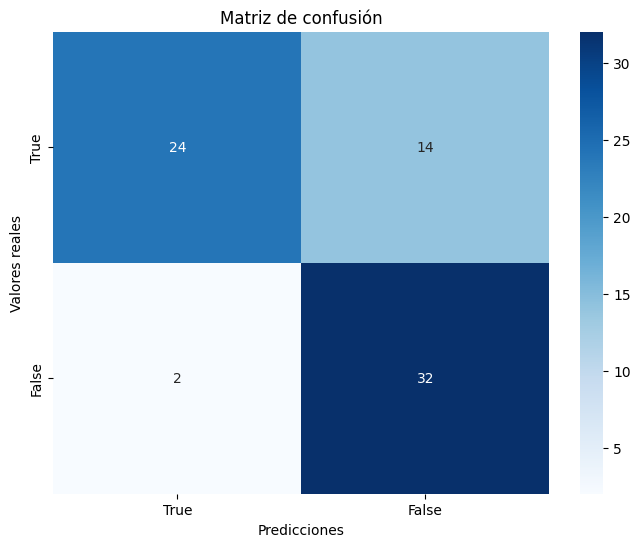

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.70      0.94      0.80        34
        True       0.92      0.63      0.75        38

    accuracy                           0.78        72
   macro avg       0.81      0.79      0.78        72
weighted avg       0.82      0.78      0.77        72



In [43]:
#Gráfica matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

# Reporte de clasificación con precisión, sensibilidad y F1-score
reporte_clasificacion = classification_report(Y_test, y_predicciones)
print("Reporte de Clasificación:")
print(reporte_clasificacion)

Curva ROC AUC: 0.8289473684210527


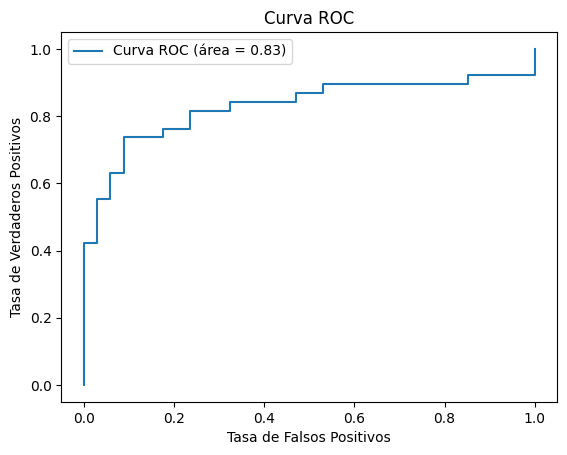

In [44]:
#Curva ROC
y_probabilidades = naive_modelo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_probabilidades)

curva_roc = roc_auc_score(Y_test, y_probabilidades)
print("Curva ROC AUC:", curva_roc)

plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % curva_roc)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()